In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC

In [51]:
# Load the Breast Cancer dataset
data = datasets.fetch_california_housing()
X, y = data.data, data.target  # capture the features data and target variables

# Display basic information about the dataset
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (20640, 8)
Target shape: (20640,)


In [52]:
# Train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse, y_pred

def plot_results(X_test, y_test, y_pred, title="Regression Results"):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='True values')
    plt.plot(X_test, y_pred, color='red', label='Prediction')
    plt.title(title)
    plt.xlabel("Feature")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

# Plot MSE vs number of features
def plot_mse_vs_features(num_features, mse_values, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(num_features, mse_values, label=f"MSE ({model_name})", marker='o')
    plt.xlabel("Number of Features")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"MSE vs. Number of Features ({model_name})")
    plt.grid(True)
    plt.legend()
    plt.show()


In [53]:
# Function to train and evaluate regression models using only the first feature
def evaluate_simple_linear_regression(X_train, X_test, y_train, y_test):
    # Use only the first feature (column 0) for simple linear regression
    X_train_simple = X_train[:, [0]]
    X_test_simple = X_test[:, [0]]

    model = LinearRegression()
    mse, y_pred = evaluate_model(model, X_train_simple, X_test_simple, y_train, y_test)
    print(f"Mean Squared Error (MSE) for Simple Linear Regression (1 feature): {mse}")
    
    # Plotting the results
    plot_results(X_test_simple, y_test, y_pred, title="Simple Linear Regression Results (1 Feature)")
    
    return mse
    

# Function to train and evaluate regression models
def evaluate_mlr_regression_models(X_train, X_test, y_train, y_test):
    mse_values = []
    num_features = list(range(1, 14))  # Features from 1 to 13

    last_mse = None

    # Loop through the models using incremental number of features
    for num in num_features:
        X_train_subset = X_train[:, :num]
        X_test_subset = X_test[:, :num]

        model = LinearRegression()
        mse, y_pred = evaluate_model(model, X_train_subset, X_test_subset, y_train, y_test)
        mse_values.append(mse)

        # Plot the regression results for the last model (using all features)
        if num == 13:
            plot_results(X_test_subset[:, 0], y_test, y_pred, title="Multiple Linear Regression Results")
            last_mse = mse
            
    # Plot MSE vs Features curve
    plot_mse_vs_features(num_features, mse_values, "Multiple")

    return last_mse


In [54]:
# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (16512, 8)
Test data shape: (4128, 8)


Mean Squared Error (MSE) for Simple Linear Regression (1 feature): 0.7091157771765548


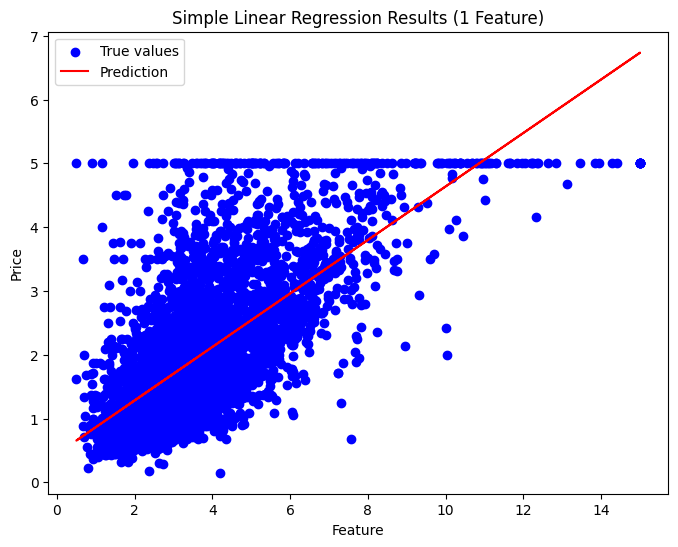

In [55]:
# Evaluate Simple Linear Regression model using the first feature
simple_mse = evaluate_simple_linear_regression(X_train, X_test, y_train, y_test)


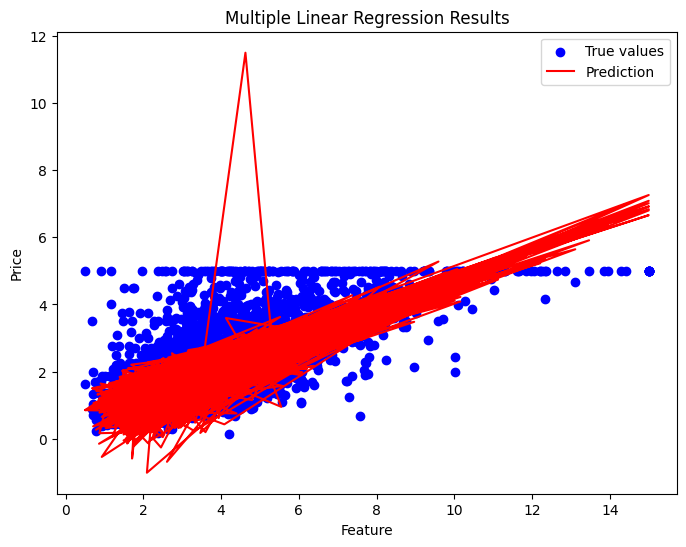

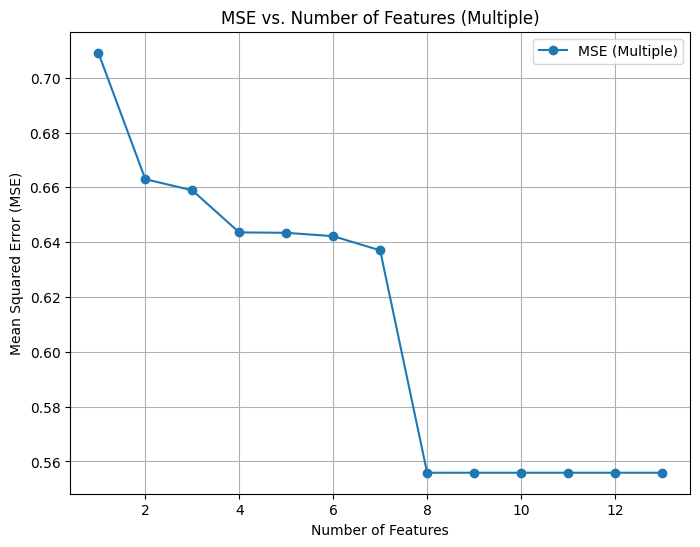

In [56]:
# Evaluate Multiple Linear Regression model using all 13 features
multiple_mse = evaluate_mlr_regression_models(X_train, X_test, y_train, y_test)


In [57]:
print(f"Mean Squared Error for Simple Linear Regression (1 feature): {simple_mse}")
print(f"Mean Squared Error for Multiple Linear Regression (13 features): {multiple_mse}")

if simple_mse < multiple_mse:
    print("Simple Linear Regression performed better (lower MSE).")
else:
    print("Multiple Linear Regression performed better (lower MSE).")

Mean Squared Error for Simple Linear Regression (1 feature): 0.7091157771765548
Mean Squared Error for Multiple Linear Regression (13 features): 0.5558915986952419
Multiple Linear Regression performed better (lower MSE).
